<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>A1 : Unsupervised Data Analysis</h2>

Ester Van de Put<br>
Business Analytics, Hult International Business School<br>
DAT-5329 | Introduction to Machine Learning & AI<br>
Chase Kusterer - Faculty of Analytics<br>
<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2> Introduction </h2>
<br><br>
This analysis based on the "Usage and Engagement Pattern for Facebook Live Seller in Thailand" (Dehouche, 2020) aims to explore the impact of video content on social media engagement, specifically focusing on Facebook. As social media highly influence the marketing landscape in Thailand, understanding the dynamics of video content engagement is, therefore, very important for advising clients effectively. Our objective is to investigate whether videos indeed lead to higher engagement compared to other forms of content, such as images or text posts. 

In this analysis, I will delve into various metrics, including reactions (likes, loves, etc.), to assess the overall engagement levels and specific reactions elicited by video content. Additionally, I will employ principal component analysis (PCA) to derive meaningful insights from the available social media metrics, identify clusters within the data, and develop logistic regression models to predict video content based on different sets of features. Through this analysis, my goal is to provide actionable recommendations to our clients regarding their social media content strategy, particularly focusing on the role of video content in maximizing engagement and reach.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong> Import Packages</strong><br>


In [1]:
########################################
# importing packages
########################################
import numpy                 as np  # mathematical essentials
import pandas                as pd  # data science essentials
import matplotlib.pyplot     as plt # fundamental data visualization
import seaborn               as sns # enhanced visualizations

# packages for unsupervised learning
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import roc_auc_score

# importing libraries

from sklearn.model_selection import train_test_split        # train-test split
from sklearn.metrics import confusion_matrix, roc_auc_score # results analysis
import sklearn.linear_model                                 # classification modeling

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Run the following code to load the dataset and set print options.</strong><br>

In [2]:
########################################
# loading data and setting display options
########################################
# loading data
fb_live = pd.read_excel('./datasets/facebook_live_data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# checking results
fb_live.head(n = 10)

,status_id,status_type,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,2018-04-22 06:00:00,512,262,432,92,3,1,1,0
1,2,photo,2018-04-18 03:22:00,0,0,204,9,0,0,0,0
2,3,video,2018-04-18 00:24:00,614,72,418,70,10,2,0,3
3,4,photo,2018-04-11 04:53:00,9,1,167,3,0,0,0,0
4,5,photo,2018-04-09 02:06:00,4,0,213,5,4,0,0,0
5,6,photo,2018-04-08 05:10:00,4,2,305,6,2,0,0,0
6,7,photo,2018-04-05 09:23:00,11,0,335,10,1,0,0,0
7,8,video,2018-03-23 07:09:00,166,36,192,28,0,1,0,0
8,9,photo,2018-03-20 01:54:00,0,0,96,0,2,0,0,0
9,10,video,2018-03-17 08:07:00,36,14,70,5,0,0,0,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Descriptive Statistics of the dataset. </h2>


In [3]:
fb_live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status_id       2297 non-null   int64         
 1   status_type     2297 non-null   object        
 2   time_published  2297 non-null   datetime64[ns]
 3   num_comments    2297 non-null   int64         
 4   num_shares      2297 non-null   int64         
 5   num_likes       2297 non-null   int64         
 6   num_loves       2297 non-null   int64         
 7   num_wows        2297 non-null   int64         
 8   num_hahas       2297 non-null   int64         
 9   num_sads        2297 non-null   int64         
 10  num_angrys      2297 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 197.5+ KB


In [4]:
# Calculate skewness for numerical columns only
skewness_numerical_features = fb_live.select_dtypes(include=['number']).skew()

print("Skewness for numerical features:\n", skewness_numerical_features)

Skewness for numerical features:
 status_id        0.000000
num_comments    10.144949
num_shares       6.168542
num_likes        3.719601
num_loves        5.971534
num_wows        15.623211
num_hahas       16.930415
num_sads        17.119842
num_angrys      10.586708
dtype: float64


**Insights on the skewness of the dataset:**

The skewness values for the numerical features in the dataset indicate a strong positive skew, meaning that the distribution of these features is not symmetrical, and the tail is longer on the right side of the distribution. Features like num_hahas, num_sads, and num_wows exhibit exceptionally high skewness, suggesting that most posts receive a low number of these reactions. Still, this would mean that there are a few posts with an unusually high number, which pulls the mean upwards and creates this skew. The closer to zero, like status_id, which makes sense since all data row has a status_id, the more symmetric the distribution is.

In [5]:
# Calculate descriptive statistics for all numerical columns in the dataset
descriptive_stats_all_features = fb_live.describe()

descriptive_stats_all_features.round(2)

,status_id,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,2297.00,2297,2297.00,2297.00,2297.00,2297.00,2297.00,2297.00,2297.00,2297.00
mean,1149.00,2016-11-29 12:18:59.921636864,205.16,39.12,221.76,13.05,1.49,0.63,0.25,0.10
min,1.00,2012-07-15 02:51:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,575.00,2016-04-04 00:17:00,0.00,0.00,18.00,0.00,0.00,0.00,0.00,0.00
50%,1149.00,2017-11-19 00:59:00,4.00,0.00,61.00,0.00,0.00,0.00,0.00,0.00
75%,1723.00,2018-03-06 02:25:00,24.00,5.00,195.00,3.00,1.00,0.00,0.00,0.00
max,2297.00,2018-06-13 00:59:00,19013.00,2139.00,4710.00,504.00,252.00,91.00,51.00,12.00
std,663.23,NaN,775.25,125.64,446.51,40.30,10.15,2.91,1.73,0.55


**Insights about the descriptive statistics summary:**

The summary statistics of the dataset indicate a heavily right-skewed distribution for the Facebook engagement metrics like comments, shares, and reactions, which align with the skewness analysis I just performed. Most values are clustered near the lower end of the scale (as indicated by the median being significantly lower than the mean), with a few posts receiving extremely high engagement, hence significantly raising the mean. For example, the 'num_comments' has a mean of 205.16 but a median of just 4, highlighting that while most posts get few comments, there are some with thousands that skew the data. Additionally, the large gap between the 75th percentile and the max values across these metrics reinforces the presence of outliers with exceptionally high engagement numbers.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>QUESTION 2:<br>
In terms of reactions (likes, loves, etc.), how do videos perform when compared to other forms of content? Are they leading in terms of total engagement? What about in engagement on specific reactions?

In [6]:
# Filter data for videovs non-video posts
video = fb_live[fb_live['status_type'] == 'video'].copy()
non_video = fb_live[fb_live['status_type'] != 'video'].copy()

# Total engagement for video vs non-video posts 
# (1) video post
video.loc[:, 'total_engagement'] = video.loc[:, ['num_comments', 
                                                 'num_shares', 
                                                 'num_likes', 
                                                 'num_loves', 
                                                 'num_wows', 
                                                 'num_hahas', 
                                                 'num_sads', 
                                                 'num_angrys']].sum(axis=1)

#(2) non-video post
non_video.loc[:, 'total_engagement'] = non_video.loc[:, ['num_comments', 
                                                         'num_shares', 
                                                         'num_likes', 
                                                         'num_loves',
                                                         'num_wows', 
                                                         'num_hahas',
                                                         'num_sads', 
                                                         'num_angrys']].sum(axis=1)

# Calculate average engagement per post type
avg_engagement_vid = video['total_engagement'].mean()
avg_engagement_nonvid = non_video['total_engagement'].mean()


# Calculate average engagement metrics for both video and non-video posts
metrics = ['num_comments', 
           'num_shares', 
           'num_likes', 
           'num_loves', 
           'num_wows', 
           'num_hahas', 
           'num_sads', 
           'num_angrys']

avg_metrics_video = video[metrics].mean()
avg_metrics_non_video = non_video[metrics].mean()

# Display results for average total engagement
print(f"Average Total Engagement for Video Posts: {avg_engagement_vid}")
print(f"Average Total Engagement for Non-Video Posts: {avg_engagement_nonvid}\n")

# Display results for specific reactions averages, video vs non-video
for metric in metrics:
    print(f"Average {metric.replace('num_', '')} - Video Posts: {avg_metrics_video[metric]:.2f} ")
    print(f"Average {metric.replace('num_', '')} - Non-Video Posts: {avg_metrics_non_video[metric]:.2f}")


Average Total Engagement for Video Posts: 960.6735218508998
Average Total Engagement for Non-Video Posts: 236.14680710994074

Average comments - Video Posts: 575.89 
Average comments - Non-Video Posts: 15.28
Average shares - Video Posts: 111.02 
Average shares - Non-Video Posts: 2.29
Average likes - Video Posts: 232.99 
Average likes - Non-Video Posts: 216.01
Average loves - Video Posts: 35.63 
Average loves - Non-Video Posts: 1.48
Average wows - Video Posts: 2.94 
Average wows - Non-Video Posts: 0.75
Average hahas - Video Posts: 1.52 
Average hahas - Non-Video Posts: 0.17
Average sads - Video Posts: 0.44 
Average sads - Non-Video Posts: 0.15
Average angrys - Video Posts: 0.25 
Average angrys - Non-Video Posts: 0.02


**Answer:**

Videos are outperforming non-video content substantially in terms of total engagement. The average total engagement for video posts is approximately four times that of non-video posts, indicating a strong preference for video content among users. When we delve into specific reactions, video posts dominate in nearly every category, particularly in comments and shares, which are critical metrics for content virality and user interaction. Video posts accrue dramatically more comments than non-video posts, suggesting that they are more likely to provoke discussion amongst viewers.

The gap in shares is even more pronounced, with video content being shared almost 50 times more on average than non-video content, which is crucial for organic reach. While the difference in likes is less extreme, video posts still maintain an edge, underscoring their general appeal. For reactions that indicate a deeper level of emotional engagement, such as 'loves', video content again sees a significantly higher average, which may reflect a more profound connection with the content.

Interestingly, the metrics for 'wows', 'hahas', 'sads', and 'angrys' are also higher for video content, though the difference is less marked compared to comments and shares. This could be because these reactions are less common overall or that they are more content-specific. Regardless, videos maintain a lead in these areas, suggesting they are more effective at eliciting emotional responses.
In summary, video content leads in total engagement and dominates across specific types of reactions, indicating its potency in capturing audience attention and eliciting a more substantial and varied emotional response. This aligns with broader trends in social media that favor dynamic, engaging, and emotionally resonant content, with videos fitting this bill perfectly.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong> Analyzing the frequency distribution of different status types in the dataset</strong><br>


In [7]:
# Check how mnay status value
unique_status_types = fb_live['status_type'].value_counts()

print(unique_status_types)

status_type
photo    1385
video     778
text      134
Name: count, dtype: int64


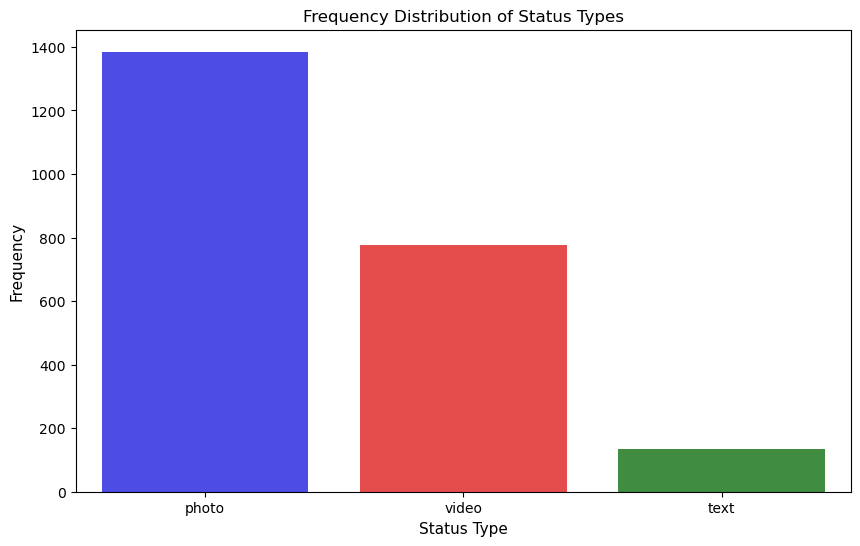

In [8]:
## DATA EXPLORATION ##

unique_status_types_count = fb_live['status_type'].value_counts()

colors = ['Blue', 'Red', 'Green']

plt.figure(figsize = (10,6))
sns.barplot(x = unique_status_types_count.index, y = unique_status_types_count.values, alpha = 0.8, palette = colors)

plt.title('Frequency Distribution of Status Types')
plt.ylabel('Frequency', fontsize    = 11)
plt.xlabel('Status Type', fontsize = 11)

plt.show()

**Insights:**

This bar chart shows the frequency distribution of different status types — photo, video, and text — in the dataset. From the chart, I can see  that photos are the most frequently posted content type, followed by videos and then text posts.

This means a few thing, first, despite photos being the most common type of content, earlier analysis indicated that videos are leading in terms of total engagement. This suggests that while users or content creators may post more photos, it's the video content that garners more interaction overall. The higher engagement rates for videos suggest that they are more effective at capturing user attention and encouraging interactions such as likes, comments, and shares compared to photos and text.

Even though they are less frequent, videos seem to have a stronger impact per post. This could be due to the dynamic nature of videos, which can convey more information and emotion, providing a richer and more immersive experience. The data implies that while users may encounter more photos in their feeds, they choose to engage more deeply with video content. For content strategists and social media marketers, this insight underscores the importance of investing in video content as part of their digital marketing efforts to maximize audience engagement.

## Transform & Drop Features

In [9]:
########################################
# Transform 'Status_type' features
######################################### 
# turn status type into integers
fb_live['status_type'] = fb_live['status_type'].map({'video': 1,'text': 0, 'photo' : 0})

/var/folders/hh/3r8kbn6x7w5345pgy8wcmpgh0000gn/T/ipykernel_89518/559422812.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i)  # Preparing subplots dynamically


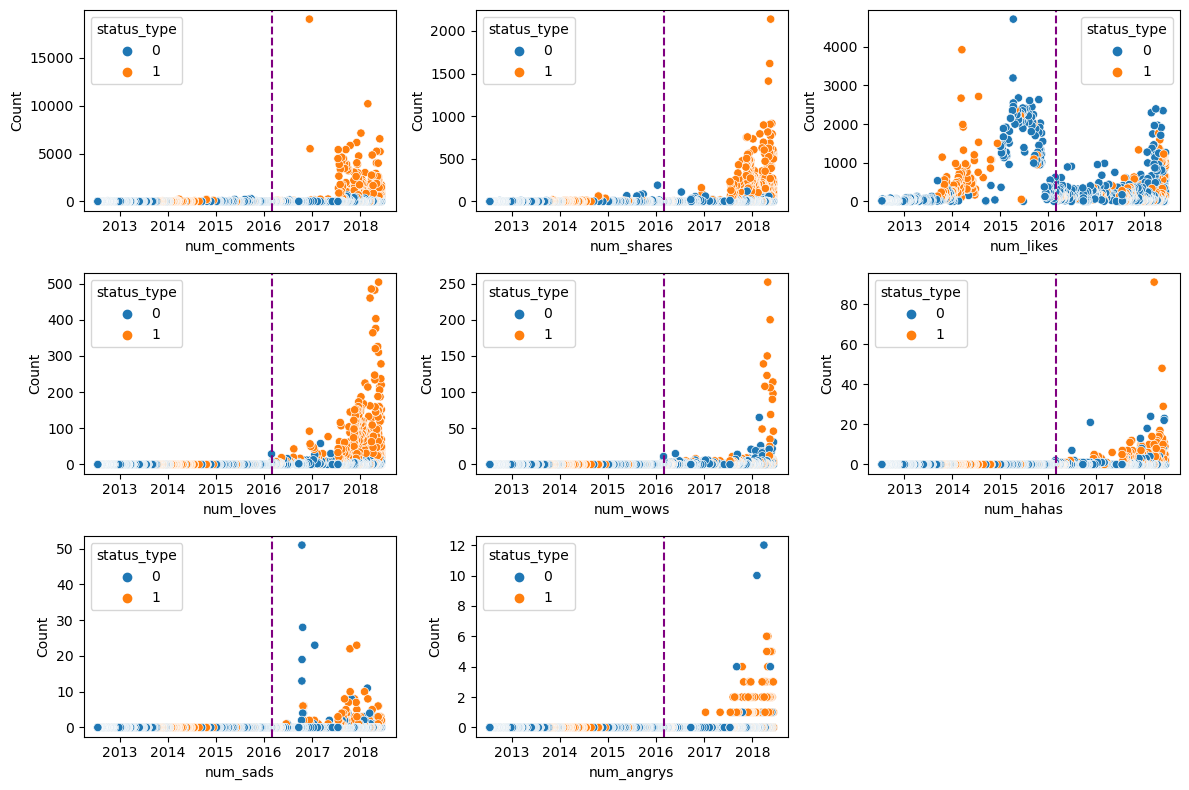

In [10]:
from datetime import datetime

# Assuming 'fb_live' DataFrame is already defined and loaded with data

# Setting figure size for the plots
fig, ax = plt.subplots(figsize=(12, 8))

# Rearranging the columns from dataframe to focus on engagement metrics, explicitly excluding 'time_published' and 'status_type' for visualization
engagement_columns = ['num_comments', 'num_shares', 'num_likes', 'num_loves', 
                      'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
engagement_df = fb_live[engagement_columns + ['time_published', 'status_type']]

# Convert the date string to a datetime object marking when reactions were introduced
line_date = datetime.strptime('2016-03-01', '%Y-%m-%d')

# Looping through the engagement metrics to create visualizations
for i, col in enumerate(engagement_columns, start=1):  # Using enumerate to manage the loop index
    plt.subplot(3, 3, i)  # Preparing subplots dynamically
    
    # Creating scatterplot for each engagement metric over time, colored by 'status_type'
    sns.scatterplot(data=fb_live, x='time_published', y=col, hue='status_type')
    
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.axvline(x=line_date, color='purple', linestyle='--')  # Line indicating when reactions were introduced
    
    if i == len(engagement_columns):  # Break if the last engagement metric is plotted
        break

plt.tight_layout()  # Adjust layout to not overlap subplots
plt.show()

**Scatter plots Insights:**

These scatter plots show the relationship between various Facebook engagement metrics—such as comments, shares, and reactions—and the publication time of posts, differentiated by the media type present in the dataset. Here, video represents statuts_type 1 (in orange), whereas non-video media type (photo and text) is defined in blue. Additionally, the vertical purple line in each graph marks March 2016, which is the moment when Facebook introduced a 'broader' choice of reactions beyond the simple "like," which includes "love", "haha", "wow", "sad", and "angry" (Dehouche, 2020). We can see that after the introduction of such features, the data is significantly higher, meaning that interaction on Facebook increased.
   
In her 2018 article, Jan Fox explores how these reactions can be habit-forming. She notes the overwhelming preference for the "love" reaction—a whopping 300 billion times used—since its inception, indicating its prime role in user interactions (Fox, 2018). 

Another interesting observation from these plots is the increase in video shares, where the orange dots are significantly higher in frequency than the blue. This hints at increased user behavior, tilting towards video sharing. 

However, the reasons behind sharing and commenting are hard to 'pinpoint' and layered—humor, engagement, awareness—especially recently on social media, where people are increasingly using the platform to raise awareness on certain current conflicts. 


In [11]:
########################################
# Add & create a Reaction feature
######################################### 
# add and create post genres
fb_live['loved']    = fb_live['num_loves'] + fb_live['num_wows'] # create the 'love' reaction based on numbers of love and wows
fb_live['funny']     = fb_live['num_hahas'] # create the 'funny' reaction based on numbers of 'haha'
fb_live['unhappy'] = fb_live['num_sads'] + fb_live['num_angrys'] # create the 'unhappy' reaction based on numbers of sads and angrys.

# Note I did not include 'like' as they could apply for all 3 and also are not 'new' reactions
# Also, I did not change numbers of comments or shares since, 
# as discussed above, these are hard to categorize into just one category. 

# create a new column 'Reaction' that contains the genre with the value for each post
fb_live['Reaction'] = fb_live[['loved', 'funny', 'unhappy']].idxmax(axis=1)

# Turn Reaction into integers
fb_live['Reaction']  = fb_live['Reaction'].map({'loved': 1, 'funny': 2, 'unhappy': 3})

In [12]:
########################################
# Transform  'Time Published' features
########################################

# extract and convert date types
fb_live['year'] = fb_live['time_published'].dt.year #extract the year
fb_live['month'] = fb_live['time_published'].dt.month # extract the month
fb_live['date'] = fb_live['time_published'].dt.day # extract the date
fb_live['time'] = fb_live['time_published'].dt.hour * 60 + fb_live['time_published'].dt.minute # extract the time

# create time bins
fb_live['time'] = pd.cut(fb_live['time'], bins=[0, 9*60, 18*60, np.inf], 
                         labels=['morning', 'day', 'evening']) # divide time into morning, day, evening 

In [13]:
########################################
# Drop and Transform features
########################################
# drop the original columns for the converted information
fb_data = fb_live.drop(labels = ['time_published', 
                                 'status_type', 
                                 'time'], axis   = 1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Check that the features were changed/created.</strong><br>


In [14]:
# Check that the columns were dropped in fb_data
fb_data.head(n=5)

,status_id,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,loved,funny,unhappy,Reaction,year,month,date
0,1,512,262,432,92,3,1,1,0,95,1,1,1,2018,4,22
1,2,0,0,204,9,0,0,0,0,9,0,0,1,2018,4,18
2,3,614,72,418,70,10,2,0,3,80,2,3,1,2018,4,18
3,4,9,1,167,3,0,0,0,0,3,0,0,1,2018,4,11
4,5,4,0,213,5,4,0,0,0,9,0,0,1,2018,4,9


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>User-Defined Functions</strong><br>
Run the following code to load user-defined functions.

In [15]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')

    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
    
    # drawing a cutoff line if specified
    if cutoff_line is not None:
        plt.axvline(x=cutoff_line, color='red', linestyle='--', linewidth=2)
        plt.text(cutoff_line + 0.1, plt.gca().get_ylim()[1] * 0.9, 
                 'Cutoff at Component {}'.format(cutoff_line), color='red')


    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()
    
    
# I couldn't add the red line cut'off so I create another scree_plot. 

def scree_plot(pca_object, cutoff_line=None, export=False):
    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)

    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth=2,
             marker='o',
             markersize=10,
             markeredgecolor='black',
             markerfacecolor='grey')

    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
    
    # drawing a cutoff line if specified
    if cutoff_line is not None:
        plt.axvline(x=cutoff_line, color='red', linestyle='--', linewidth=2)
        plt.text(cutoff_line + 0.1, plt.gca().get_ylim()[1] * 0.9, 
                 'Cutoff at Component {}'.format(cutoff_line), color='red')

    if export:
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')

    # displaying the plot
    plt.show()

########################################
# unsupervised_scaler
########################################
def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Scale the data.</h4>

In [16]:
# applying the unsupervised_scaler function
fb_live_scaled = scaler(df = fb_data)



# checking pre- and post-scaling variance
print(np.var(fb_data)) #pre-scaled data
print(np.var(fb_live_scaled)) # scaled data

status_id       439684.000000
num_comments    600747.659991
num_shares       15777.648758
num_likes       199283.755500
num_loves         1623.436268
num_wows           103.026569
num_hahas            8.475518
num_sads             2.985442
num_angrys           0.306909
loved             2131.340537
funny                8.475518
unhappy              3.573000
Reaction             0.062159
year                 3.658704
month               13.026085
date                76.553768
dtype: float64
status_id       1.0
num_comments    1.0
num_shares      1.0
num_likes       1.0
num_loves       1.0
num_wows        1.0
num_hahas       1.0
num_sads        1.0
num_angrys      1.0
loved           1.0
funny           1.0
unhappy         1.0
Reaction        1.0
year            1.0
month           1.0
date            1.0
dtype: float64


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part II: Principal Component Analysis</h2>

<h4>a) Develop a PCA object with no limit to principal components and analyze its scree plot.</h4>

In [17]:
relevant_features = ['num_comments', 'num_shares', 'num_likes', 'num_loves',
                     'num_wows', 'num_hahas', 'num_sads', 'num_angrys',
                     'loved', 'funny', 'unhappy', 'Reaction'] # picking the relevant features for my analysis

<h4>b) Develop a scree plot and determine how many principal components to retain.</h4>

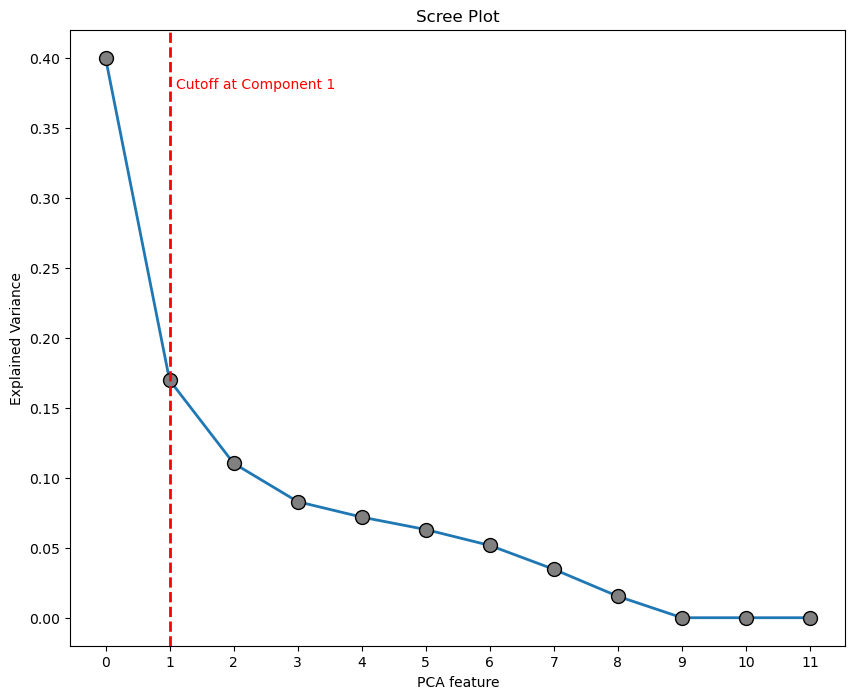

               PC0   PC1
num_comments  0.29 -0.00
num_shares    0.38 -0.13
num_likes     0.12 -0.07
num_loves     0.41 -0.15
num_wows      0.24 -0.18
num_hahas     0.32 -0.07
num_sads      0.17  0.60
num_angrys    0.28  0.09
loved         0.41 -0.17
funny         0.32 -0.07
unhappy       0.23  0.57
Reaction      0.05  0.44
               PC0   PC1
num_comments  0.29 -0.00
num_shares    0.38 -0.13
num_likes     0.12 -0.07
num_loves     0.41 -0.15
num_wows      0.24 -0.18
num_hahas     0.32 -0.07
num_sads      0.17  0.60
num_angrys    0.28  0.09
loved         0.41 -0.17
funny         0.32 -0.07
unhappy       0.23  0.57
Reaction      0.05  0.44


In [18]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components=None, random_state=702)

# FITTING and TRANSFORMING the scaled data
fb_live_pca = pca.fit_transform(fb_live_scaled[relevant_features])

# Calling the scree_plot function with the cutoff_line parameter set to 1, 
# so that it aligns with the elbow and I will have 2 PCA (PC0 and PC1)

# generating the plot and include a cutoff line at component 1.
scree_plot(pca_object=pca, cutoff_line=1)

# Presenting the factor loadings for the retained principal components
factor_loadings = pd.DataFrame(pca.components_[:2].T, columns=['PC0', 'PC1'], index=relevant_features)
print(factor_loadings.round(2))

# Presenting the factor loadings for the retained principal components
factor_loadings = pd.DataFrame(pca.components_[:2].T, columns=['PC0', 'PC1'], index=relevant_features)
print(factor_loadings.round(2))

In [19]:
# INSTANTIATING a new model using the first three principal components
pca_2 = PCA(n_components = 2, # according to scree plot (elbow criteria) and variance
            random_state = 702)


# FITTING and TRANSFORMING the purchases_scaled
#fb_live_pca_3 = pca_3.fit_transform(fb_live_scaled[relevant_features])
fb_live_pca = pca_2.fit_transform(fb_live_scaled[relevant_features])


fb_df = pd.DataFrame(data = fb_live_pca)

### Question 3 

I decided to draw the cutoff line at the second principal component in the scree plot for several reason:

- Elbow Criteria: The most significant drop in the explained variance occurs after the second component, which is indicative of the "elbow" in the scree plot. This is a widely used metrics that suggests that components beyond the elbow will not add substantial value to our model.

- Variance Retention: The first two components collectively explain a significant portion of the total variance within the dataset. This retention is crucial for capturing the essence of the data without overly complexifying the model or doing data dumping.

- Interpretability: With two components, the model remains interpretable and manageable. Each principal component can be understood and described in terms of original features, which aligns well with the goals of PCA to reduce dimensionality while preserving the meaning and accuracy/reliability behind the data.

- Simplicity and Parsimony: Retaining fewer principal components aligns with the principle of parsimony, avoiding overfitting and making the model simpler and more generalizable.

- Strategic Analysis: From a strategic standpoint, focusing on three dimensions allows for a concentrated analysis of content engagement patterns. It will enables me to create a more targeted approach in advising on content creation, especially for video content, which thrives on high engagement, emotional connection, and entertainment value.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>OPTIONAL STEP</strong><br>Run the following code to compare the variance of the unlimited PCA model with the variance of the reduced PCA model to  show that the explained variance for each principal component does not change after dropping smaller PCs.

<h4>c) Present the factor loadings for the retained principal components.</h4>

In [20]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))

# naming rows as original features
factor_loadings.index = relevant_features 


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_2 = pd.DataFrame(np.transpose(pca_2.components_))

# naming rows as original features
factor_loadings_2.index = relevant_features 


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_2.round(2)}
""")



MAX Components Factor Loadings
------------------------------
                0     1     2     3     4     5     6     7     8     9     10    11
num_comments  0.29 -0.00 -0.05  0.43 -0.38 -0.03  0.44  0.60 -0.17 -0.00  0.00 -0.00
num_shares    0.38 -0.13 -0.16  0.22 -0.04  0.01  0.24 -0.35  0.76 -0.00  0.00  0.00
num_likes     0.12 -0.07 -0.17 -0.73 -0.61  0.14  0.16 -0.04 -0.00 -0.00 -0.00 -0.00
num_loves     0.41 -0.15 -0.19  0.09  0.09  0.05  0.02 -0.36 -0.46 -0.53  0.37  0.00
num_wows      0.24 -0.18 -0.30 -0.36  0.41 -0.43 -0.13  0.51  0.19 -0.13  0.09  0.00
num_hahas     0.32 -0.07  0.60 -0.10 -0.04 -0.11 -0.10  0.01  0.02  0.01 -0.00  0.71
num_sads      0.17  0.60 -0.11  0.04 -0.16 -0.31 -0.20 -0.08  0.00 -0.38 -0.54  0.00
num_angrys    0.28  0.09 -0.03 -0.03  0.17  0.81 -0.30  0.29  0.10 -0.12 -0.17  0.00
loved         0.41 -0.17 -0.23 -0.00  0.17 -0.05 -0.01 -0.20 -0.36  0.61 -0.43 -0.01
funny         0.32 -0.07  0.60 -0.10 -0.04 -0.11 -0.10  0.01  0.02 -0.01  0.00 -0.71
un

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4> Question 3 : Interpret & Rename each of the retained principal components</h4>

In [21]:
### how do I know what to call these?? Like what they represent??? 


# Naming each principal component for the 3 PC model
factor_loadings_2.columns = ['Buzz Factor', 
                             'Heartstring Tug']

# Checking the result for the first five rows
factor_loadings_2.sort_values(by = 'Buzz Factor', ascending = False)

,Buzz Factor,Heartstring Tug
loved,0.409860,-0.166397
num_loves,0.408585,-0.146277
num_shares,0.378479,-0.132569
num_hahas,0.317956,-0.074303
funny,0.317956,-0.074303
num_comments,0.292105,-0.004897
num_angrys,0.277029,0.086490
num_wows,0.242272,-0.176172
unhappy,0.234035,0.571431
num_sads,0.167208,0.597407


**Insights per features for each PCA:**
- **num_comments:** Moderately positively correlated with the Buzz Factor, indicating higher comments often lead to more engagement. However, it's negligibly correlated with the Heartstring Tug dimension, suggesting comments don't strongly evoke emotions.

- **num_shares:** Strongly positively correlated with the Buzz Factor, implying widely shared posts garner higher engagement. But it moderately negatively correlates with the Heartstring Tug, implying highly shared posts may not evoke strong emotional responses.

- **num_likes:** Weakly positively correlated with the Buzz Factor, suggesting more likes slightly increase engagement. However, it negligibly correlates with emotional engagement.

- **num_loves:** Strongly positively correlated with both Buzz Factor and Heartstring Tug, implying posts with more love reactions have higher engagement and evoke emotions.

- **num_sads:** Strongly positively correlated with Heartstring Tug, suggesting posts with more sad reactions evoke - stronger emotions. But it weakly correlates with the Buzz Factor, implying sad reactions don't significantly increase engagement.

- **num_angrys:** Moderately positively correlated with Heartstring Tug, indicating posts with more anger reactions evoke strong emotions. However, it weakly correlates with the Buzz Factor, implying anger reactions don't substantially increase engagement.

- **loved:** Strongly positively correlated with both Buzz Factor and Heartstring Tug, implying posts receiving more "loved" reactions have higher engagement and evoke emotions.

- **funny:** Moderately positively correlated with Buzz Factor, suggesting funny posts increase engagement. But it strongly negatively correlates with Heartstring Tug, implying humor may not evoke strong emotions.

- **unhappy:** Strongly positively correlated with Heartstring Tug, suggesting posts evoking more unhappiness generate strong emotional responses. But it weakly correlates with the Buzz Factor, implying unhappiness may not increase engagement significantly.

- **Reaction:** Weakly correlates positively with the Buzz Factor and Heartstring Tug dimensions. This implies that posts with more diverse reactions tend to have slightly higher overall engagement and may evoke mild emotional responses from the audience. However, its impact on engagement levels or emotional resonance is not as strong as other features.


**Answer QUestion 3 b), c) & d):**

Principal Component 1 (PC0): "**"Buzz Factor""**
PC1, the "Buzz Factor," is characterized by high loadings in features associated with active and positive user engagement, such as 'num_loves' and 'num_shares'. A higher score on this component is likely reflective of content that generates a significant amount of social interaction, indicating that the audience not only notices the content but is moved to engage with it through actions that signal approval or endorsement. On the opposite end, a lower score might suggest content that, while possibly viewed, fails to stimulate a similar level of active response, indicating a potential area for creative improvement. This component is critical for identifying content with the potential for virality and high visibility. In essence, it's a gauge of the magnetic pull of content – how well it draws in and holds the audience's attention.

Principal Component 2 (PC1): **""Heartstring Tug""**
PC2, which I've termed "Heartstring Tug," represents the emotional charge of content, particularly capturing negative emotional reactions such as sadness, as indicated by strong positive loadings on 'num_sads' and 'unhappy'. This dimension can be thought of as the depth of emotional engagement; high values here might be posts that evoke sympathy, thoughtfulness, or a shared sense of grief, which can lead to a strong viewer connection. On the other side, content that scores lower on this component may be less likely to evoke such deep emotional responses and might benefit from more emotive storytelling or content strategies to engage the audience on an emotional level. The "Heartstring Tug" is thus indicative of the emotional resonance of content – its power to move the audience emotionally and create a memorable impact.

In [22]:
# analyzing factor strengths per customer
factor_loadings = pca_2.transform(fb_live_scaled[relevant_features])

# converting to a DataFrame
#factor_loadings_df = pd.DataFrame(data= factor_loadings_3)
factor_loadings_df = pd.DataFrame(data= factor_loadings)

# renaming columns
factor_loadings_df.columns = factor_loadings_2.columns


# Checking the results for the first 15 rows
factor_loadings_df.head(n=5)

,Buzz Factor,Heartstring Tug
0,2.572016,-0.518176
1,-0.586794,-0.137111
2,3.714511,0.372471
3,-0.704337,-0.089141
4,-0.527981,-0.193421


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Intro to Clustering</h2><br>
First, build an agglomerative clustering model, note that we are interested in the <strong>dendrogram</strong> and the <strong>inertia plot</strong>. 
The goal is to develop an idea as to how many clusters would be appropriate given our analysis of these tools, and then to apply this number of clusters to a k-Means model. 

<strong> a) Check Variance amongst clusters and rescale our data since the variance amongst our features is no longer equal.

In [23]:
# checking variance amongst clusters
np.var(factor_loadings_df)

Buzz Factor        4.803013
Heartstring Tug    2.037917
dtype: float64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>b) Generate a scaled version of the factor loadings dataset.</h4>

In [24]:
# applying the unsupervised_scaler function
pca_rescaled = scaler( df = factor_loadings_df)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df), '\n\n')
print(np.var(pca_rescaled))

Buzz Factor        4.803013
Heartstring Tug    2.037917
dtype: float64 


Buzz Factor        1.0
Heartstring Tug    1.0
dtype: float64


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Agglomerative Clustering</h2><br>
Agglomerative clustering starts with each observation in its own cluster. From here, it links observations  based on distance. There are three primary methods for calculating distance:<br><br>

    ward (default) - groups observations into clusters in a way that minimizes 
    the variance amongst all clusters. Leads to clusters that are relatively
    equal in size

    average - merges clusters that have the smallest average distance
    between all their points

    complete - merges clusters that have the smallest maximum distance
    between their points

<br><br>
<u>Primary Advantage</u><br>
Able to generate a dendrogram to better understand data groupings and help determine the final number of clusters to develop.
<br><br>
<u>Primary Disadvantage</u><br>
Unable to predict on new data.<br><br>

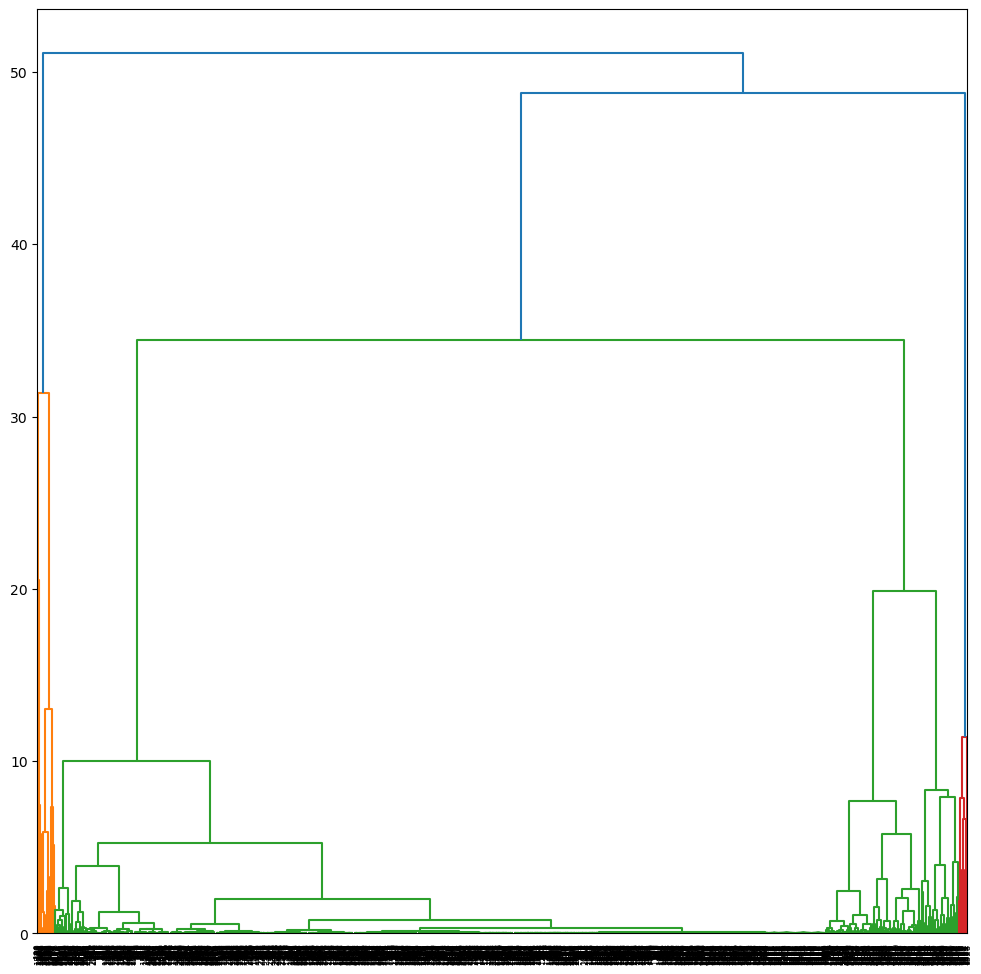

In [25]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_rescaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation  = 90       ,
           leaf_font_size = 6        )


# rendering the plot
plt.show()

**Dendogram Insights + Question 4) a):**

The dendrogram shows two main clusters, indicated by the longest vertical branch separating one cluster from the rest. This visual graph, therefore, suggests that two clusters should capture enough structural differences in the data without overcomplicating the model. The Ward method, known for creating compact and balanced clusters by minimizing within-cluster variance, also reinforces the choice for 2 clusters by indicating how distinct the data points within each of these two clusters are.

Selecting two clusters is also consistent with the PCA analysis I performed earlier, which showed that two principal components accounted for a substantial portion of the variance in the data. A two-cluster would probably reflect the underlying patterns identified by PCA, hence providing a coherent and interpretable clustering that aligns with the principal component structure. 

Finally, a simpler model with fewer clusters tends to be more robust and generalizable, reducing the risk of overfitting that often comes with too many clusters. Therefore, based on the dendrogram, the PCA results, and my goal to create a simple and interpretable model, I decided that two clusters would be the best choice for this analysis and dataset.


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>a) Develop a k-Means model with three clusters.</h4>

In [26]:
# INSTANTIATING a k-Means object with five clusters
fb_live_k_pca = KMeans(n_clusters   = 2     ,
                        n_init       = 'auto',
                        random_state = 702   )


# fitting the object to the data
fb_live_k_pca.fit(pca_rescaled)


# converting the clusters to a DataFrame
fb_live_kmeans_pca = pd.DataFrame({'Cluster': fb_live_k_pca.labels_})


# checking the results
fb_live_kmeans_pca.value_counts(normalize=True).round(decimals=2)

Cluster
0          0.95
1          0.05
Name: proportion, dtype: float64

**Insights** :

Based upon all the scree plot and the dendogram, the proportion I just found, it appears that the two clusters would explain 100% of the data, which aligns with my prior asusmption and reinforce my choice for the number of clusters (see Q4)a)). Again, when using only two principal components, a two-cluster solution provides a simple yet effective way to understand the data's structure. 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>b) Display the centroids (mean values) for each cluster.</h4>
When you are finished, interpret their meaning. 

In [27]:
# storing cluster centers
centroids_pca = fb_live_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca).round(decimals = 2)


# renaming principal components
centroids_pca_df.columns = ['Buzz Factor', 
                            'Heartstring Tug']  # changed after


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Buzz Factor,Heartstring Tug
0,-0.19,-0.04
1,3.39,0.67


**Insights:**

Cluster 0 has negative values for both the Buzz Factor and Heartstring Tug dimensions. This suggests that posts in this cluster generally receive lower engagement levels and produce less emotional responses.

In contrast, Cluster 1 exhibits significantly higher values for both the Buzz Factor and Heartstring Tug dimensions. This indicates that posts in this cluster experience much higher engagement levels and evoke stronger emotional responses from the audience compared to Cluster 0.

Overall,  Cluster 1 represents posts with exceptionally high engagement and emotional resonance, while Cluster 0 represents posts with lower levels of engagement and emotional impact.

Based upon this, let's answer **Question 4 c)** : Rename each segment based on interpretation

- Cluster 0: **"Mild Engagement and Emotional Resonance"** (Buzz Factor: -0.19, Heartstring Tug: -0.04)
Explanation: This cluster represents posts with moderate levels of engagement and a slight emotional appeal. Indeed, the cluster represents a group with steady yet moderate engagement levels and emotional responses, as indicated by the closer-to-zero centroid values for 'Buzz Factor' and 'Heartstring Tug'. While they may not generate extensive interaction, they still manage to evoke mild emotional responses from the audience, indicating a potential for deeper emotional engagement with improved content strategies.
<br><br>
- Cluster 1: **"Intense Engagement and Emotional Connection"** (Buzz Factor: 3.39, Heartstring Tug: 0.67)
Explanation: This cluster consists of posts with exceptionally high levels of engagement and strong emotional resonance. These posts not only generate significant social interaction but also provoke intense emotional responses, fostering a deep emotional connection with the audience. I can assume that the post in this cluster have a profound impact on viewers, evoking strong emotions and creating a memorable experience.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Run the following code to concatenate channel, region, and the PCA components into one DataFrame.</h4>

In [28]:
# Concatenating cluster memberships with principal components
clst_pca_df = pd.concat([fb_live_kmeans_pca,
                        factor_loadings_df],
                        axis=1)

# Correcting the rounding step and concatenating
final_df = pd.concat([fb_live.loc[ : , ['status_type', 'Reaction']],
                      clst_pca_df.round(decimals = 2)],
                      axis = 1)

# Renaming columns after ensuring your 'factor_loadings_df' aligns with these new names
final_df.columns = ['Media', 'Reaction', 'Cluster',
                    'Buzz Factor',
                    'Heartstring Tug']

# Checking the results
final_df.head(n=5)

,Media,Reaction,Cluster,Buzz Factor,Heartstring Tug
0,1,1,0,2.57,-0.52
1,0,1,0,-0.59,-0.14
2,1,1,1,3.71,0.37
3,0,1,0,-0.70,-0.09
4,0,1,0,-0.53,-0.19


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part V: Create the clusters</h2><br>

As mentionned earlier, I decided to partition the data into two clusters as adding more clusters would not significantly improve the variance in the dataset. 

By selecting two clusters, we can effectively capture the majority of the variability present in the data while maintaining a model that is relatively simple and interpretable.  Additionally, a two-cluster solution allows for clear differentiation between distinct segments within the dataset, facilitating easier interpretation and actionable insights for subsequent analysis. 

Now, I will **rename the channel and cluster**

In [29]:
# renaming channels
media_type   = {1 : 'Video',
                0 : 'Non-Video'}


final_df['Media'].replace(media_type, inplace = True)


# renaming time of day
#time_of_day  = {'morning' : 'Morning',
                #'day'     : 'Day',
                #'evening' : 'Evening'}
Reaction = {1: 'loved',
            2: 'funny', 
            3: 'unhappy'}


final_df['Reaction'].replace(Reaction, inplace = True)


# renaming clusters
cluster_names = {0 : 'Mild Engagement and Emotional Resonance',
                 1 : 'Intense Engagement and Emotional Connection'}


final_df['Cluster'].replace(cluster_names, inplace = True)


# checking results
print(final_df.head(n = 5))

       Media Reaction                                      Cluster  Buzz Factor  Heartstring Tug
0      Video    loved      Mild Engagement and Emotional Resonance         2.57            -0.52
1  Non-Video    loved      Mild Engagement and Emotional Resonance        -0.59            -0.14
2      Video    loved  Intense Engagement and Emotional Connection         3.71             0.37
3  Non-Video    loved      Mild Engagement and Emotional Resonance        -0.70            -0.09
4  Non-Video    loved      Mild Engagement and Emotional Resonance        -0.53            -0.19


<h3>Create first segment: </h3><br>

In [30]:
print(f"""\
 -----------------------------------------
| Mild Engagement and Emotional Resonance |
 -----------------------------------------

Proportion of Observations
--------------------------
{round(len(final_df.loc[final_df['Cluster'] == 'Mild Engagement and Emotional Resonance']) /
       len(final_df), ndigits=2)}

Centroids
---------
{centroids_pca_df.loc[0].to_string(dtype=False, name=False)}

Media
-----
{final_df.loc[final_df['Cluster'] == 'Mild Engagement and Emotional Resonance', 'Media']
         .replace({1: 'Video', 0: 'Non-Video'})
         .value_counts(normalize=True)
         .round(2)
         .sort_index()
         .to_string()}

Reaction
--------------
{final_df.loc[final_df['Cluster'] == 'Mild Engagement and Emotional Resonance', 'Reaction']
         .replace({1: 'loved', 2: 'funny', 3: 'unhappy'})
         .value_counts(normalize=True)
         .round(2)
         .sort_index()
         .to_string()}
""")


 -----------------------------------------
| Mild Engagement and Emotional Resonance |
 -----------------------------------------

Proportion of Observations
--------------------------
0.95

Centroids
---------
Buzz Factor       -0.19
Heartstring Tug   -0.04

Media
-----
Media
Non-Video    0.69
Video        0.31

Reaction
--------------
Reaction
funny      0.01
loved      0.98
unhappy    0.01



**Question 4)b)** : 
Present and interpret each segment using cluster centroids and give an example of a "normal" post in each segment.

**Segment 1: Mild Engagement and Emotional Resonance**
This segment represents posts that evoke a mild level of engagement but carry emotional resonance. The proportion of observations in this segment is substantial, accounting for 95% of the dataset. The centroid analysis reveals that the posts in this segment have a slightly negative "Buzz Factor" and a negligible "Heartstring Tug," indicating a modest level of excitement and emotional appeal. Interestingly, while the majority of posts are non-videos (69%), a significant portion (31%) are videos, suggesting that sellers in this segment leverage visual content to enhance emotional connections with their audience. Furthermore, the reaction analysis shows that the overwhelming sentiment expressed by viewers is love (98%), indicating that these posts successfully elicit positive emotional responses, fostering a sense of affection and connection among the audience.

**Example of a "normal post" in this segment:**
A typical post in this segment could be a live video featuring a Thai fashion seller showcasing their latest collection (Dehouche, 2020). In the video, the seller could, for example, passionately describes each item, emphasizing its unique features and benefits, while engaging with viewers in real-time through comments and reactions. Especially since we know that the seller's genuine enthusiasm and personalized interaction with the audience can evoke feelings of warmth and appreciation, which would lead to a flood of "loved" reactions and supportive comments from viewers. Overall, this would be a great example of a 'normal post' for this segment as it would generate moderate engagement but fosters an emotional connection with the audience, hence improving maybe the number of followers for the online seller and thus - in the long term- improve the brand/sellers sales and profit.

**Question 4)c):**

In the "Mild Engagement and Emotional Resonance" segment, the content is mostly non-video media, with photos and text making up 69% of the posts. This indicates that while videos are included, they do not dominate this cluster as they do in segments with more intense engagement. Interestingly, despite a lower "Buzz Factor" and "Heartstring Tug" centroids, this segment—encompassing the vast majority of observations at 95%—still maintains a considerable amount of 'loved' reactions, which amount to 98%. This high proportion of 'loved' reactions suggests that even without the dynamic appeal of video content, non-video posts can elicit a warm response from the audience.

The relatively low presence of 'funny' and 'unhappy' reactions at 1% each indicates that the content in this cluster typically elicits a positive and consistent, but not highly varied, emotional response. For content creators and marketers aiming at a broad and steady engagement without the peaks associated with more sensational or compelling video content, this cluster's data suggests a strategy of crafting reliably heartwarming or sentimentally engaging content, such as visually appealing images or relatable stories. This approach may not generate the intense buzz of video content but appears to foster a stable and positive connection with a broad user base.


<h3>Create second segment: </h3><br>

In [50]:
# dynamic string with value counts for each demographic (cluster 2)
print(f"""\
 --------------------------------------------
|Intense Engagement and Emotional Connection |
 --------------------------------------------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "Cluster"][final_df.loc[ : , "Cluster"] == 'Intense Engagement and Emotional Connection']) /
       len(final_df), ndigits = 2)}


Centroids
---------
{centroids_pca_df.loc[1, :].to_string(dtype = False, name = False)}


Media
-----
{final_df.loc[ : , "Media"][ final_df.loc[ : , 'Cluster' ] == 'Intense Engagement and Emotional Connection']

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
  
  
Reaction
--------------
{final_df.loc[ : , "Reaction"][ final_df.loc[ : , 'Cluster' ] == 'Intense Engagement and Emotional Connection']

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
""")


 --------------------------------------------
|Intense Engagement and Emotional Connection |
 --------------------------------------------

Proportion of Observations
--------------------------
0.05


Centroids
---------
Buzz Factor        3.39
Heartstring Tug    0.67


Media
-----
Media
Non-Video    0.12
Video        0.88
  
  
Reaction
--------------
Reaction
funny      0.03
loved      0.89
unhappy    0.08



**Question 4)b)** : PART II

**Segment 2: Intense Engagement and Emotional Connection**
This segment comprises posts that create intense engagement and establish deep emotional connections with the audience. However, it only represents 5% of the observation, which is a small proportion of the dataset. The centroid analysis reveals significantly higher values for both the "Buzz Factor" and the "Heartstring Tug," indicating a high level of excitement and emotional appeal in these posts. This is interesting since the majority of posts in this segment are videos (88%), which suggest that sellers in this category heavily rely on visual content, particularly live videos, to drive engagement and emotional resonance (Dehouche, 2020). It also implies that video might be a better way to foster response from the audience. The reaction analysis shows a balanced distribution of sentiments, with a notable emphasis on love (89%) - which included 'num_love' and 'num_wow' - indicating that these posts evoke positive emotional responses while also eliciting some humorous and unhappy reactions, but to a much lower extent (only 3% and 8% respectively).

**Example of a "normal post" in this segment:**
A typical post in this segment could be a live video featuring a Thai cosmetics seller hosting a makeup tutorial and Q&A session (Dehouche, 2020). In the video, the seller could, for example, demonstrates various makeup techniques, shares beauty tips, and engages with viewers by answering their questions and addressing their concerns in real-time. The high-energy presentation, combined with personalized interaction and valuable content, could help captivates the audience, which would in return lead to a surge of "loved" reactions and enthusiastic comments from viewers. Despite some occasional humorous or unhappy reactions, the overwhelming sentiment expressed by the audience is love. This therefore highlights the effectiveness of the 'hypothetical' post in fostering deep emotional connections and driving meaningful engagement.

**Question 4)c):** PART II

In the "Intense Engagement and Emotional Connection" segment, video content is a significant driver of interaction, making up 88% of the media type within this group. This prevalence of videos corresponds with the segment's high centroid values for "Buzz Factor" and "Heartstring Tug," reinforcing the idea that videos are particularly effective at capturing attention and evoking strong emotional responses. The compelling nature of video content, which often includes live videos or interactive 'Facebook live', appears to resonate deeply with users, leading to a high proportion of 'loved' reactions—accounting for 89% of the reaction/responses on those posts. 

Despite representing a smaller portion of the observations (5%), this 'small' segment highlights the significant impact of videos on user engagement, suggesting that while videos are less frequent compared to other type of content on Facebook (which is text and photos), they have a powerful capacity to generate buzz and connect emotionally with the audience. The data implies that when videos do appear, they are likely to receive more engagement and a warmer reception from the users, which is shown by a dominance of 'loved' reactions. This concentration of positive responses may point towards a strategy for content creators and sellers to focus on producing high-quality video content to foster stronger engagement and build emotional bonds with their audience.

## Overall takeways from clusters in regard of content diversity: 


This assignment aimed to create video content within the context of Facebook Live sellers in Thailand. The dataset shows patterns regarding engagement and media type preferences among users, and - as explained earlier - I divided the data into 2 segments: "Mild Engagement and Emotional Resonance" and "Intense Engagement and Emotional Connection," to try and see a nuanced view of user interactions.

For the "Mild Engagement and Emotional Resonance" segment, which accounts for 95% of observations, the predominant media type is non-video (69%). This aligns with historical trends on Facebook, where the platform initially emphasized photos and text-based content before the advent of video and live streaming capabilities (Nadkarnia et al., 2012). The dominance of non-video content in this segment suggests a lasting legacy of user behavior favoring these types of media, even though video content has gained traction (especially since TikTok with the emergence of 'reals'. The high percentage of 'loved' reactions (98%) within this segment indicates that, although not as dynamic as video, non-video content still successfully generates a positive engagement among users.

In contrast, though much smaller, the "Intense Engagement and Emotional Connection" segment shows the engagement capability of video content, comprising 88% of the media within this category. The significantly higher values for "Buzz Factor" and "Heartstring Tug" underscore video content's effectiveness in eliciting strong emotional responses and higher excitement levels compared to non-video posts. This finding supports the company's stance on the high engagement value of videos, particularly in the context of Facebook Live, where sellers leverage live video streams to interact directly with viewers, creating an immersive and interactive shopping experience.

So, when it comes to this assignment, I believe that understanding that the "Mild Engagement and Emotional Resonance" segment predominantly features non-video content yet still welcomes a lot of engagement just highlights how important it is to have a balanced content strategy. Because though video drives higher-intensity interactions, non-video content remains a significant component of user engagement on Facebook (Nadkarnia et al., 2012). In other words, I believe suggesting our client focus only on video content might overlook the nuanced engagement landscape on Facebook, where a mix of content types—tailored to different audience segments—can maximize reach and engagement and, therefore, profit.


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part V: Model Building (Pre Steps)</h2><br>

In [32]:
from sklearn.preprocessing import StandardScaler

# standardizing the data for clustering
scaler = StandardScaler()
pca_rescaled = scaler.fit_transform(pd.DataFrame(data=fb_live_pca))


# INSTANTIATING a k-Means object with clusters
fb_live_k_pca = KMeans(n_clusters   = 2 ,
                         n_init       = 'auto',
                         random_state = 702   )


# fitting the object to the data
fb_live_k_pca.fit(pca_rescaled)


# converting the clusters to a DataFrame
fb_live_kmeans_pca = pd.DataFrame(data = {'Cluster': fb_live_k_pca.labels_})


# checking cluster populations
fb_live_kmeans_pca.iloc[: , 0].value_counts()

Cluster
0    2177
1     120
Name: count, dtype: int64

In [33]:
# factorizing cluster results 
cluster_dummies = pd.get_dummies(data=fb_live_kmeans_pca['Cluster'], prefix='Cluster', 
                                 drop_first=True).astype(int)

# checking results
cluster_dummies.value_counts(normalize=False).sort_index(ascending=False)

Cluster_1
1             120
0            2177
Name: count, dtype: int64

In [34]:
# checking which observations belong to each cluster
fb_live_kmeans_pca.head(n = 5)

,Cluster
0,0
1,0
2,1
3,0
4,0


In [35]:
## freate binary indicator for video content

fb_live['is_video'] = (fb_live['status_type'] == 1).astype(int)

# Preview the new column
fb_live[['status_type', 'is_video']].head()

,status_type,is_video
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


In [36]:
# Creating dummy variables from the cluster labels for logistic regression
cluster_df = pd.get_dummies(data=fb_live_kmeans_pca['Cluster'], prefix='Cluster', drop_first=True)

# Previewing the first few rows
print(cluster_df.head())

   Cluster_1
0      False
1      False
2       True
3      False
4      False


In [37]:
# To see the distribution as a percentage
cluster_distribution = cluster_df.sum() / len(fb_live_kmeans_pca)

# Print the distribution
print(cluster_distribution)

Cluster_1    0.052242
dtype: float64


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part VI: Create the Models</h2><br>

<h3> Model 1: Original (relevant) x-features </h3><br>

In [38]:
#### Model 1 ####

# selecting x- and y-data
x_data = fb_live[relevant_features]
y_data = fb_live['is_video']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.35,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [39]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                max_iter     = 1000, # to avoid the warning abt iteration reached limit
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


print(f"""
Train-Test Gap: {abs(train_acc - test_acc).round(decimals = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.015
Test AUC Score: 0.717



In [40]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 516
False Positives: 16
False Negatives: 146
True Positives : 126



<h3> Model 2: Retained principal components </h3><br>

In [41]:
#### Model 2 ####

# selecting x- and y-data
x_data = pd.DataFrame(data=fb_live_pca)
y_data = fb_live['is_video']


# training and testing sets
x_train, x_test, y_train, y2_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.35,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [42]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model2_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y2_test )
roc_score = roc_auc_score  (y_true      = y2_test,
                            y_score     = model2_pred)


print(f"""
Train-Test Gap: {abs(train_acc - test_acc).round(decimals = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.002
Test AUC Score: 0.698



In [43]:
# unpacking the confusion matrix
model2_tn, \
model2_fp, \
model2_fn, \
model2_tp = confusion_matrix(y_true = y2_test, y_pred = model2_pred).ravel()

# printing each result one-by-one
print(f"""
True Negatives : {model2_tn}
False Positives: {model2_fp}
False Negatives: {model2_fn}
True Positives : {model2_tp}
""")


True Negatives : 518
False Positives: 14
False Negatives: 157
True Positives : 115



<h3> Model 3: Retained clusters </h3><br>

In [44]:
#### Model 3 ####

# selecting x- and y-data
x_data = cluster_dummies
y_data = fb_live['is_video']


# training and testing sets
x_train, x_test, y_train, y3_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.35,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [45]:
# Import packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model3_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y3_test )
roc_score = roc_auc_score  (y_true      = y3_test,
                            y_score     = model3_pred)


print(f"""
Train-Test Gap: {abs(train_acc - test_acc).round(decimals = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.009
Test AUC Score: 0.554



In [46]:
# storing cluster centers
centroids_pca = pd.DataFrame(data = fb_live_k_pca.cluster_centers_)


# checking cluster centers
centroids_pca.round(decimals = 2)

,0,1
0,-0.19,-0.04
1,3.39,0.67


In [47]:
# unpacking the confusion matrix
model3_tn, \
model3_fp, \
model3_fn, \
model3_tp = confusion_matrix(y_true = y3_test, y_pred = model3_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model3_tn}
False Positives: {model3_fp}
False Negatives: {model3_fn}
True Positives : {model3_tp}
""")


True Negatives : 527
False Positives: 5
False Negatives: 240
True Positives : 32



## Best Model 
**Question 6:**

**Question 6)a)**: rationale for why this is the best model

I picked Model 1, which included the orginal x-features. Indeed, considering the unique dynamics of Facebook's social media environment, particularly for Live sellers in Thailand, the selected model stands out due to its balanced performance metrics. The Train-Test Gap of just 0.015 exemplifies the model's strength and its ability to generalize well to unseen data, minimizing the risk of overfitting, which is often an issue when building predictive models. This is crucial in the rapidly evolving landscape of social media, where user behavior and engagement patterns can shift quickly. Additionally, the Test AUC Score of 0.717 indicates the model's competent ability to distinguish between different levels of user engagement, a critical capability when tailoring content strategies to maximize impact and 'engagement'. The model's predictive performance, especially in identifying true positives and negatives, suggests it can provide actionable insights for optimizing video content to enhance user engagement and interaction on Facebook.

In [48]:
#### Model 1: Original x-features ####

# selecting x- and y-data
x_data = fb_live[relevant_features]
y_data = fb_live['is_video']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.35,
                                                    random_state = 702,
                                                    stratify     = y_data)

# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                max_iter     = 1000, # to avoid the warning abt iteration reached limit
                                                random_state = 702)

# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


print(f"""
Train-Test Gap: {abs(train_acc - test_acc).round(decimals = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.015
Test AUC Score: 0.717



**Question 6)b)**: Model results: train-test gap based on accuracy & AUC score based on the results of the .predict step

The model's performance metrics, notably the Train-Test Gap and the Test AUC Score highlight its practical utility for targeting and engaging audiences on Facebook Live. With a Train-Test Gap of just 0.015, the model showcases excellent consistency across both training and testing datasets, indicating robust generalization capabilities. This small gap indicates that the model accurately captures and predicts user behavior without being too tailored to the training data alone — a common issue called overfitting that often arise when building predictive models . Furthermore, a Test AUC Score of 0.717 signifies the model's solid ability to distinguish between users likely to engage with content and those not. This ranking ability, as opposed to simple binary classification, is especially beneficial for Facebook Live sellers looking to allocate their efforts more efficiently, ensuring that they focus on creating content that resonates with the most receptive segments of their audience.

In [49]:
confusion_df = pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = model_pred), columns=['False', 'True'], index = ['False', 'True'])
print('Confusion Matrix')
confusion_df.head()

Confusion Matrix


,False,True
False,516,16
True,146,126


**Question 6)c)** : Confusion matrix: error & risks explanation.

The confusion matrix for this model reveals critical insights into its predictive performance in the context of Facebook Live sellers in Thailand. With 516 True Negatives, the model can correctly identify instances where users are not engaged, helping prevent wasteful allocation of resources towards less effective content. The 126 True Positives indicate the model's utility in identifying engaging content, which is crucial for optimizing content strategy. However, the 16 False Positives could mislead sellers into overvaluing certain content types or strategies that might not drive engagement, potentially misdirecting marketing efforts. More significantly, the 146 False Negatives represent a substantial missed opportunity in recognizing engaging content, which could lead to the underutilization of highly effective content types or themes. This is especially critical in the fast-paced social media marketing environment, where capturing and maintaining user interest is paramount for success. Reducing False Negatives could significantly enhance a seller's ability to engage users and drive meaningful interactions, underscoring the need for model refinement focused on improving sensitivity toward creating 'real' engaging content.

## References


Dehouche, N. (2020). Dataset on usage and engagement patterns for Facebook Live sellers in Thailand. Data in Brief, 30, 105661. Retrieved March 17th, 2024, from www.elsevier.com/locate/dib

Fox, J. (2018). An unlikeable truth: Social media like buttons are designed to be addictive. They’re impacting our ability to think rationally. Index on Censorship, 47(3). Retrieved March 20th, 2024, from https://journals.sagepub.com/doi/full/10.1177/0306422018800245

Grammarly. (n.d.). Retrieved March 20th, 2024, from https://www.grammarly.com

Nadkarni, A., & Hofmann, S. G. (2012). Why do people use Facebook? Personality and Individual Differences, 52(3), 243–249. Retrieve March 19th, 2024, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3335399/



OpenAI. (n.d.). Retrieved March 20th, 2024, from https://openai.com


<br>